<a href="https://colab.research.google.com/github/puneat/ML_project_UCS611/blob/data-visualization/EDA_ML_UCS611.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
cd /gdrive/My Drive/ml

/gdrive/My Drive/ml


In [0]:
import numpy as np
import csv
from numpy import array
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import statistics
from scipy.integrate import odeint
%matplotlib inline 
import pandas as pd
import os
import re
import seaborn as sns
import math
import bokeh 
import matplotlib.pyplot as plt
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import row, column
from bokeh.models import Span


output_notebook(resources=INLINE)
le=LabelEncoder()


In [32]:
# reading our time series data of cases in india into cases object
with open('case_time_series.csv', 'r') as f:
    cases = list(csv.reader(f, delimiter=','))
cases=array(cases) # converting cases to an array
cases[-3:,:] # last 3 recoreds

array([['29-May', '8138', '173496', '11735', '82633', '269', '4979',
        '6992', '4988.2', '191', '7254.270781', '6076.477061',
        '202.7858512', '6705.4', '4035.8', '167.7', '6676.628971',
        '4658.552607', '177.946039', '577.6418098', '1417.924455',
        '24.83981218'],
       ['30-May', '8364', '181860', '4303', '86936', '205', '5184',
        '7383.8', '5246', '202.4', '7624.14353', '5485.377157',
        '203.523827', '6970.6', '4156.2', '175', '6983.393024',
        '4593.913143', '182.8644491', '640.7505054', '891.4640139',
        '20.65937787'],
       ['31-May', '8749', '190609', '4916', '91852', '224', '5408',
        '7950.2', '5511.8', '212.4', '7999.058191', '5295.60375',
        '210.3485354', '7238.5', '4332.8', '182.6', '7304.380373',
        '4652.468534', '190.3428922', '694.6778188', '643.1352169',
        '20.00564319']], dtype='<U15')

In [0]:
#creating a num_days object with the length of number of days since first case
num_days = np.linspace(1,cases.shape[0]-1 , cases.shape[0]-1)

#reading total confirmed, recovered and deaths day wise
total_cases=cases[1:,[2,4,6]];

# reading the 5 day rolling moving average
day5_ma_confirmed=cases[1:,[1,7,10]]; #daily confirmed
day5_ma_recovered=cases[1:,[3,8,11]]; #daily recovered
day5_ma_deaths=cases[1:,[5,9,12]]; #daily deaths

# reading the 10 day rolling moving average
day10_ma_confirmed=cases[1:,[1,13,16]]; #daily confirmed
day10_ma_recovered=cases[1:,[3,14,17]]; #daily recovered
day10_ma_deaths=cases[1:,[5,15,18]]; #daily deaths

# reading the EMA5-EMA5 MACD 
macd_confirmed=cases[1:,[1,19]]; #daily confirmed
macd_recovered=cases[1:,[3,20]]; #daily recovered
macd_deaths=cases[1:,[5,21]]; #daily deaths

In [0]:
def plot_data(num_days,total_cases, label,plot_title):
  total_cases.astype(float); # typecasting to float
  fig = plt.figure(facecolor='w',figsize=(14,6)) # creating a plot figure
  ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
# creating new timeline for intrapolated data
  num_days_new = np.linspace(num_days.min(), num_days.max(), 488)
#performing intrapolation
  for i in range(0,total_cases.shape[1]):
    spl = make_interp_spline(num_days,total_cases[:,i], k=3)  # type: BSpline for smoothing the plot
    power_smooth = spl(num_days_new)
    ax.plot(num_days_new, power_smooth, linewidth=2, label=label[i]) #plotting the intrapolated data
#beautifying the plot
  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Patients')
  ax.set_title(plot_title)
  ax.yaxis.set_tick_params(length=0); ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
  plt.show()

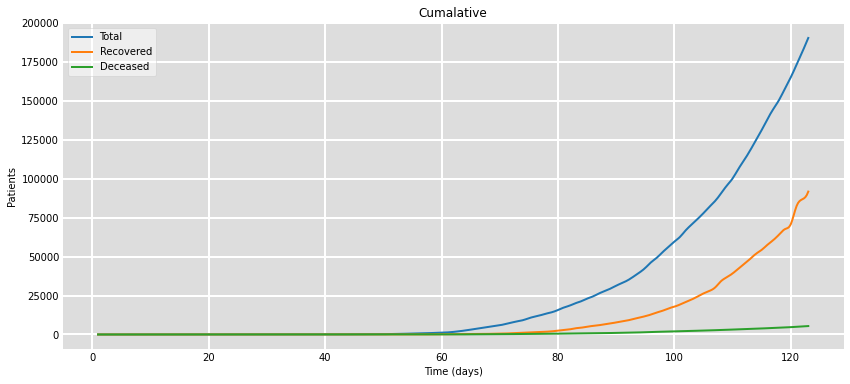

In [34]:
plot_data(num_days,total_cases,['Total','Recovered','Deceased'],'Cumalative')

In [0]:
import csv
with open('interpolated_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(hello)

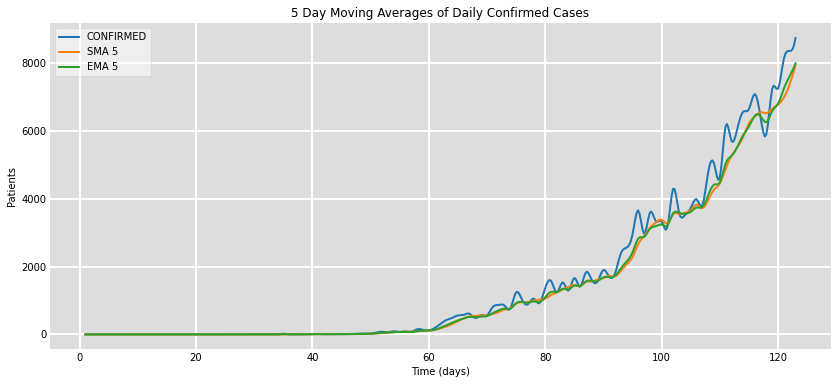

In [36]:
plot_data(num_days,day5_ma_confirmed,['CONFIRMED','SMA 5','EMA 5'],
                  '5 Day Moving Averages of Daily Confirmed Cases')

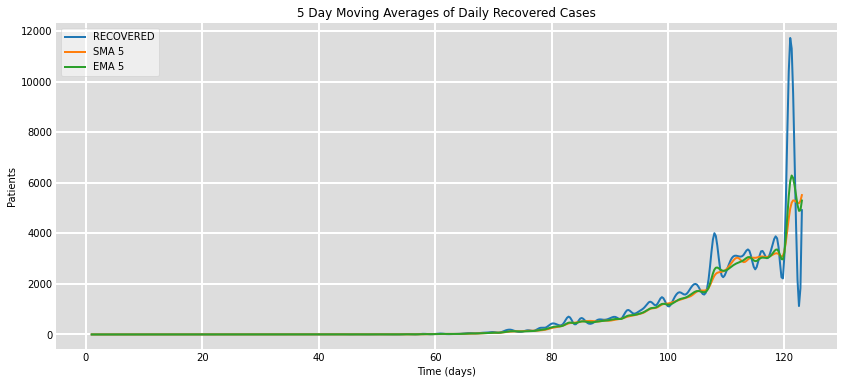

In [40]:
plot_data(num_days,day5_ma_recovered,['RECOVERED','SMA 5','EMA 5'],
                  '5 Day Moving Averages of Daily Recovered Cases')

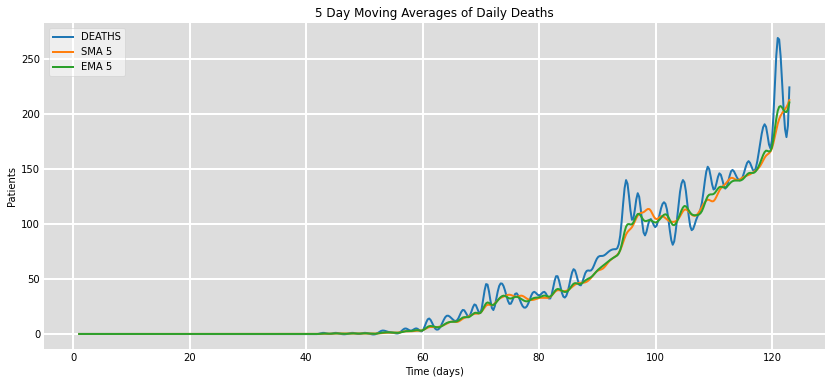

In [41]:
plot_data(num_days,day5_ma_deaths,['DEATHS','SMA 5','EMA 5'],
                  '5 Day Moving Averages of Daily Deaths')

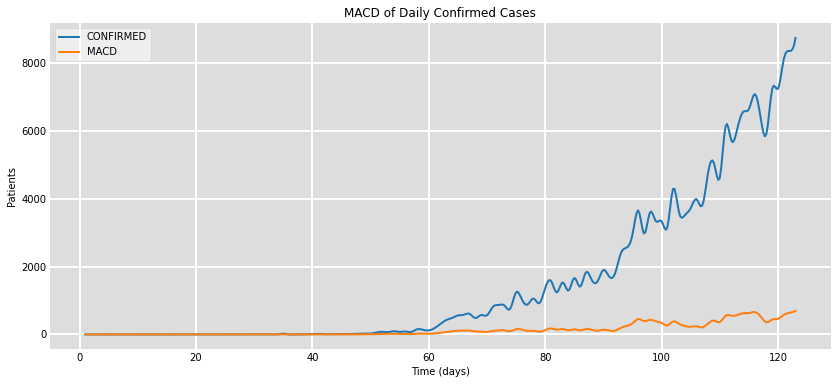

In [46]:
plot_data(num_days,macd_confirmed,['CONFIRMED','MACD'],'MACD of Daily Confirmed Cases')

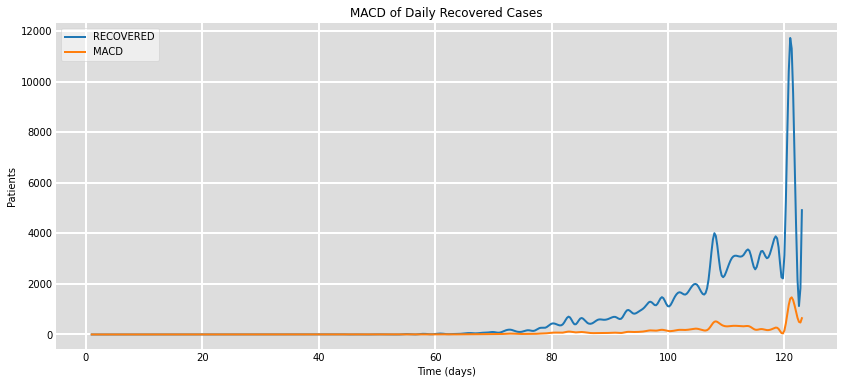

In [47]:
plot_data(num_days,macd_recovered,['RECOVERED','MACD'],'MACD of Daily Recovered Cases')

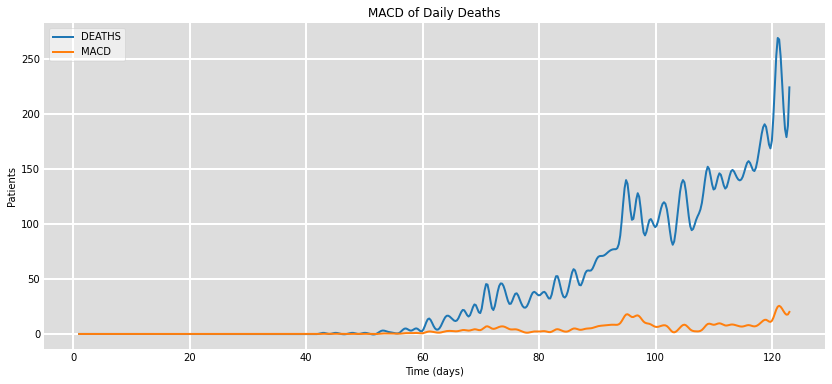

In [48]:
plot_data(num_days,macd_deaths,['DEATHS','MACD'],'MACD of Daily Deaths')

In [0]:
agegroup=pd.read_csv('/gdrive/My Drive/ml/covid19-in-india/AgeGroupDetails.csv')
covid_19_india=pd.read_csv('/gdrive/My Drive/ml/covid_19_india.csv')
hospital_beds=pd.read_csv('/gdrive/My Drive/ml/covid19-in-india/HospitalBedsIndia.csv')
individual_details=pd.read_csv('/gdrive/My Drive/ml/covid19-in-india/IndividualDetails.csv')

In [50]:
agegroup

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


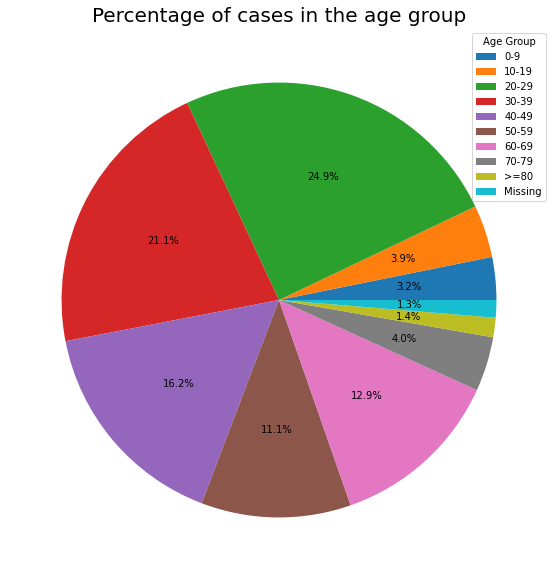

In [54]:
perc=[]
for i in agegroup['Percentage']:
    per=float(re.findall("\d+\.\d+",i)[0])
    perc.append(per)
agegroup['Percentage']=perc
plt.figure(figsize=(20,10))
plt.title('Percentage of cases in the age group',fontsize=20)
plt.pie(agegroup['Percentage'],autopct='%1.1f%%')
plt.legend(agegroup['AgeGroup'],loc='best',title='Age Group')

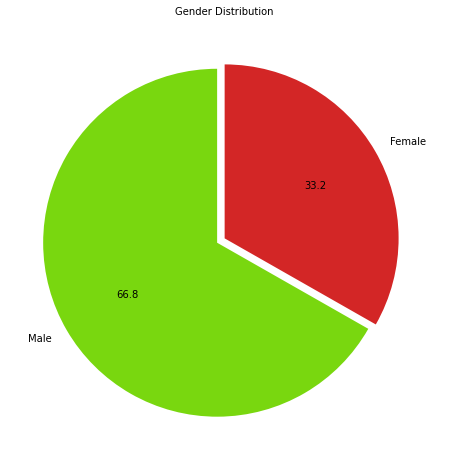

In [62]:
labels = ['Male', 'Female']; sizes = []
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])
explode = (0.05, 0)
colors = ['#79d70f','#d32626']
plt.figure(figsize= (8,8))
plt.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f',startangle=90)
plt.title('Gender Distribution',fontsize=10)
plt.show ()

<Figure size 1440x720 with 0 Axes>

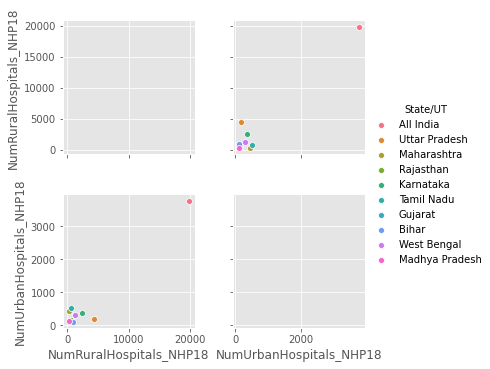

In [69]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
top_10=hospital_beds.nlargest(10,'TotalPublicHealthFacilities_HMIS')
top_10=top_10[['State/UT','NumPrimaryHealthCenters_HMIS'                     
                    ,'NumRuralHospitals_NHP18' ,'NumUrbanHospitals_NHP18']]
sns.pairplot(top_10,hue='State/UT')

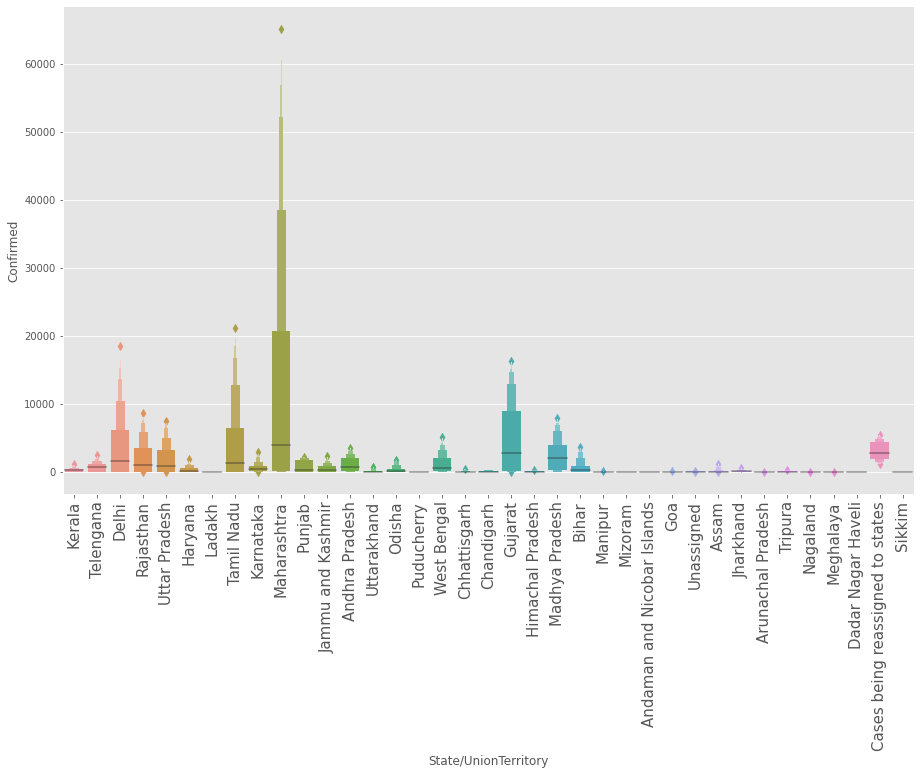

In [70]:
g=sns.catplot(x='State/UnionTerritory',y='Confirmed',kind='boxen',data=covid_19_india)
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=90,fontsize=15)

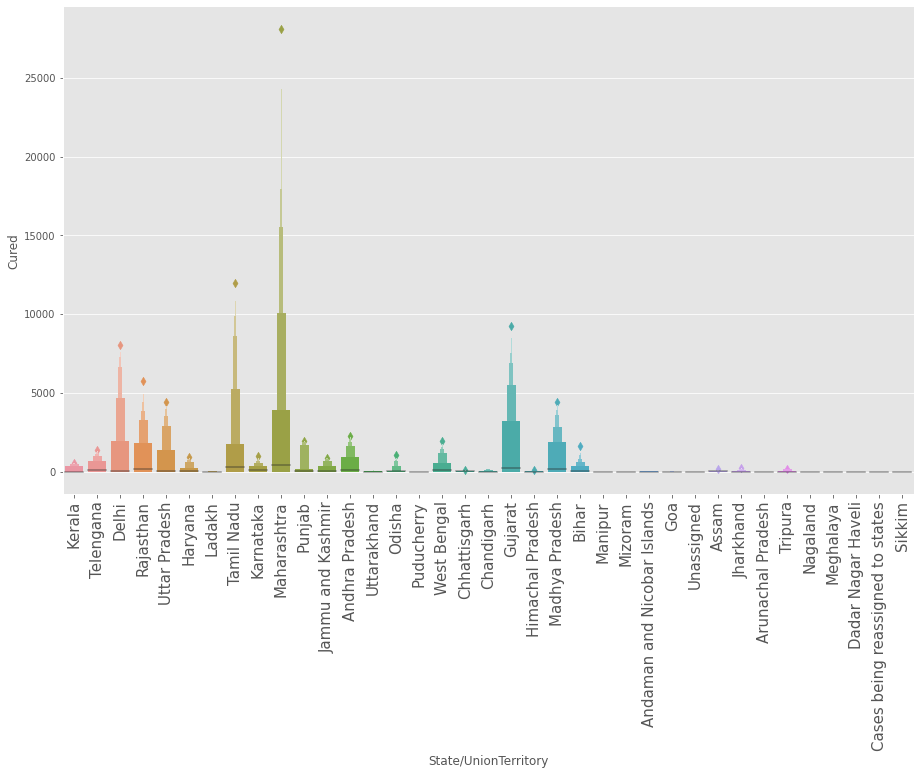

In [71]:
g=sns.catplot(x='State/UnionTerritory',y='Cured',kind='boxen',data=covid_19_india)
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=90,fontsize=15)

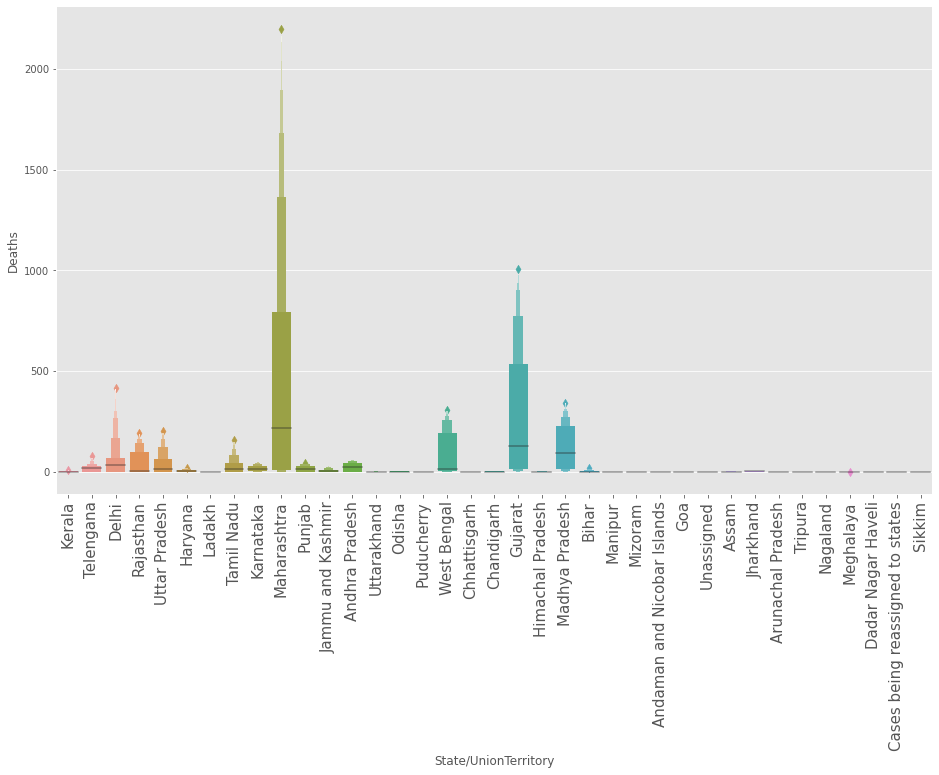

In [73]:
g=sns.catplot(x='State/UnionTerritory',y='Deaths',kind='boxen',data=covid_19_india)
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=90,fontsize=15)

In [77]:
state_details = pd.pivot_table(covid_19_india, values=['Confirmed', 'Deaths', 'Cured'], index='State/UnionTerritory', aggfunc='max')
state_details['Recovery Rate'] = round(state_details['Cured'] / state_details['Confirmed'],3)*100
state_details['Death Rate'] = round(state_details['Deaths'] /state_details['Confirmed'], 3)*100
state_details = state_details.sort_values(by='Confirmed', ascending= False)
state_details.style.background_gradient(cmap='Blues')

,Confirmed,Cured,Deaths,Recovery Rate,Death Rate
State/UnionTerritory,,,,,
Maharashtra,65168,28081,2197,43.100000,3.400000
Tamil Nadu,21184,12000,160,56.600000,0.800000
Delhi,18549,8075,416,43.500000,2.200000
Gujarat,16343,9230,1007,56.500000,6.200000
Rajasthan,8617,5739,193,66.600000,2.200000
Madhya Pradesh,7891,4444,343,56.300000,4.300000
Uttar Pradesh,7445,4410,201,59.200000,2.700000
Cases being reassigned to states,5491,0,0,0.000000,0.000000
West Bengal,5130,1970,309,38.400000,6.000000


In [78]:
print('Total Confirmed Cases: ',sum((state_details['Confirmed'])))
print('Total Recovered Cases: ',sum((state_details['Cured'])))
print('Total Deaths: ',sum((state_details['Deaths'])))

Total Confirmed Cases:  182220
Total Recovered Cases:  86984
Total Deaths:  5165
